# Formation Machine Learning

Bienvenue dans ce notebook d’exercices pour la formation en Machine Learning !  
Cette formation a pour but d’explorer les concepts fondamentaux du machine learning à travers des implémentations pratiques en Python et l’utilisation de bibliothèques populaires comme `scikit-learn`, `numpy`, `pytorch`, etc.

## Contenu

Voici un aperçu des sujets couverts dans ce notebook :

- Régression linéaire
- Régression polynomiale
- Régression logistique
- Arbres de décision, Forêts aléatoires et Gradient Boosting
- Réseaux de neurones

## Structure typique d’un exercice

Chaque exercice suit généralement la structure suivante :

1. **Séparation en jeu d’entraînement / validation**
2. **Implémentation et entraînement du modèle**
3. **Évaluation du modèle avec des métriques pertinentes**

## Pré-requis

Avant de commencer, assurez‑vous d’avoir :
- **Suivi le MOOC** : [Initiez‑vous au Machine Learning](https://openclassrooms.com/fr/courses/8063076-initiez-vous-au-machine-learning) (OpenClassrooms)
- **Lu les chapitres 1 à 4** de la série [Neural Networks](https://www.3blue1brown.com/topics/neural-networks) (3Blue1Brown)
- **Réalisé le tutoriel** : [PyTorch Basics](https://docs.pytorch.org/tutorials/beginner/basics/intro.html)

## Pour aller plus loin

Voici quelques ressources pour approfondir vos connaissances en Machine Learning au-delà de ce qui a été présenté dans ce notebook:

- [MIT 6.036 - Introduction to Machine Learning](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/course/) ⭐⭐
- [MIT 6.S191 - Introduction to Deep Learning](https://www.youtube.com/watch?v=alfdI7S6wCY&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) ⭐⭐
- [MIT 18.657 - Mathematics of Machine Learning](https://ocw.mit.edu/courses/18-657-mathematics-of-machine-learning-fall-2015/download/) ⭐⭐⭐
- [PolyMTL INF8245E - Machine Learning (Vidéos)](https://www.youtube.com/watch?v=-6ChHxllZVU&list=PLImtCgowF_ETupFCGQqmvS_2nqErZbifm) ⭐⭐
- [PolyMTL INF8245E - Machine Learning (Notes)](https://drive.google.com/drive/folders/1xUqzxJK5NbAxUZOInpTBAAQk8iwKSKVS) ⭐⭐
- [PolyMTL INF8359DE - Reinforcement Learning](https://www.youtube.com/watch?v=J9JZyyPCJcQ&list=PLImtCgowF_ES_JdF_UcM60EXTcGZg67Ua) ⭐⭐
- [PolyMTL MTH3302 - Méthodes probabilistes et statistiques pour l'IA](https://github.com/decorJim/mth3302) ⭐⭐⭐
- [An Introduction to Statistical Learning — Gareth James, Daniela Witten, Trevor Hastie & Robert Tibshirani](https://www.statlearning.com/) ⭐⭐
- [Statistical Learning Theory — Vladimir N. Vapnik](https://www.wiley.com/en-us/Statistical-Learning-Theory-9780471030034) ⭐⭐⭐

Légende:
- ⭐: pas (ou peu) de pré‑requis en ML/programmation/maths.
- ⭐⭐: notions de base acquises; à l’aise avec Python + algèbre linéaire + probabilités.
- ⭐⭐⭐: solide bagage mathématique (analyse, probabilités, statistiques, optimisation) et envie de rigueur théorique.

## Imports

In [2]:
import unittest
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)


## Régression Linéaire

Dans cet exercice, vous allez créer un modèle de machine learning pour **prédire la valeur médiane des maisons (`target`, en centaines de milliers $) à partir du revenu médian (`MedInc`) d’un district californien**.  
Vous ne disposerez que d’une seule variable explicative, ce qui facilitera la visualisation de la droite de régression.

### Objectifs pédagogiques
1. **Comprendre** les étapes essentielles d’un workflow de *machine learning* :  
   préparation des données, entraînement, validation et visualisation.  
2. **Implémenter** les fonctions `train`, `eval` et `main` afin de :  
   - séparer le jeu de données en `train` / `validation` (`train_test_split`) ;  
   - entraîner un modèle `LinearRegression` de *scikit-learn* ;  
   - calculer et afficher les métriques : **RMSE**, **MSE** et **R²** ;  
   - récupérer le coefficient et l’ordonnée à l’origine appris.  
3. **Interpréter** la pente obtenue pour relier le revenu aux prix des maisons et discuter de la qualité de la prédiction.

### Jeu de données
Nous utiliserons le **California Housing Dataset** disponible dans *scikit-learn*.

*Référence utile : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html*

### Code fourni

In [3]:
def plot(model: LinearRegression, X: np.ndarray, y: np.ndarray):
    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, s=10, alpha=0.4, label="Données brutes")
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = model.predict(x_line)
    plt.plot(x_line, y_line, color="red", lw=2, label="Droite de régression")
    plt.xlabel("Revenu médian")
    plt.ylabel("Prix médian d'un maison")
    plt.title("Le marché immobilier californien - régression linéaire simple")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Code à compléter

Métriques : {'rsme': np.float64(0.8494105152406937), 'mse': 0.7214982234014606, 'r2': 0.4466846804895943}
Coefficient (pente): 0.4203217769894005
Ordonnée à l'origine: 0.4432063522765708


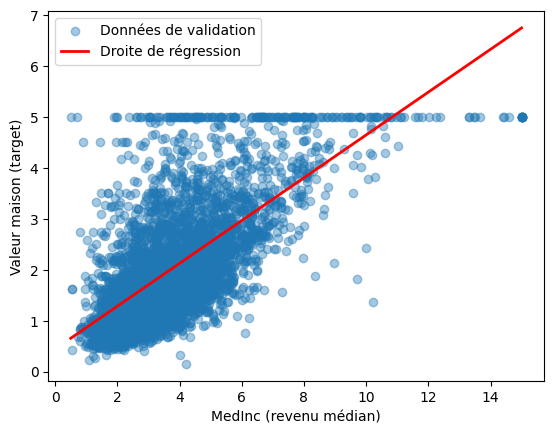

In [9]:
def train(X_train: np.ndarray, y_train: np.ndarray) -> LinearRegression:
    """
    Entraîne un modèle de régression linéaire sur les données fournies.

    Parameters
    ----------
    X_train : np.ndarray
        Matrice des variables explicatives pour l'entraînement,
        de forme (n_samples, n_features).
    y_train : np.ndarray
        Vecteur des valeurs cibles d'entraînement,
        de forme (n_samples,).

    Returns
    -------
    model : LinearRegression
        Modèle de régression linéaire ajusté sur les données.
    """
    # TODO: Effectuer la régression linéaire sur l'ensemble d'entraînement
    mymodel=LinearRegression()
    mymodel.fit(X_train,y_train)
    return mymodel
    #raise NotImplementedError()

def eval(model: LinearRegression, X_val: np.ndarray, y_val: np.ndarray) -> dict[str, float]:
    """
    Évalue les performances du modèle sur un ensemble de validation.

    Parameters
    ----------
    model : LinearRegression
        Modèle de régression linéaire préalablement entraîné.
    X_val : np.ndarray
        Matrice des variables explicatives pour la validation,
        de forme (n_samples, n_features).
    y_val : np.ndarray
        Vecteur des valeurs cibles pour la validation,
        de forme (n_samples,).

    Returns
    -------
    metrics : dict[str, float]
        Dictionnaire contenant les métriques, où les clés sont :

        - ``rmse`` : erreur quadratique moyenne racine.
        - ``mse``  : erreur quadratique moyenne.
        - ``r2``   : coefficient de détermination R².
    """
    # TODO: Effectuer la validation du modèle sur l'ensemble de validation
    predvalue=model.predict(X_val)
    mse=mean_squared_error(y_val,predvalue)
    rmse=np.sqrt(mse)
    r2=r2_score(y_val,predvalue)
    return{"rsme":rmse,"mse":mse,"r2":r2}
    #raise NotImplementedError()

def main(test_ratio: float = 0.2, random_state: int = 0):
    data = fetch_california_housing()
    X = data.data[:, [data.feature_names.index("MedInc")]]
    y = data.target

    # TODO: Séparer le jeu de données en ensembles d'entraînement et de validation
    X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=test_ratio, random_state=random_state)


    # TODO: Instancier et entraîner votre modèle et effectuer la validation du modèle
    mymodel = train(X_train, y_train)
    metrics = eval(mymodel, X_val, y_val)

    # TODO: Afficher les métriques, les coefficients et l'ordonnée à l'origine
    #       du modèle

    print("Métriques :", metrics)
    print("Coefficient (pente):", mymodel.coef_[0])
    print("Ordonnée à l'origine:", mymodel.intercept_)

    # TODO: Afficher la visualisation du jeu de données avec la droite de
    #       régression linéaire à l'aide de la fonction plot

    plt.scatter(X_val, y_val, alpha=0.4, label="Données de validation")
    x_line = np.linspace(X_val.min(), X_val.max(), 200).reshape(-1, 1)
    y_line = mymodel.predict(x_line)
    plt.plot(x_line, y_line, color="red", linewidth=2, label="Droite de régression")
    plt.xlabel("MedInc (revenu médian)")
    plt.ylabel("Valeur maison (target)")
    plt.legend()
    plt.show()
    #raise NotImplementedError()

if __name__ == "__main__":
    main()

### Tests

In [ ]:
EXPECTED = {
    "coef": 0.4203217769894005,
    "intercept": 0.4432063522765708,
    "rmse": 0.8494105152406937,
    "mse": 0.7214982234014606,
    "r2": 0.4466846804895943,
}

TOL = 1e-2

class TestLinearRegression(unittest.TestCase):
    def test_train_learns_coefficients(self):
        rng = np.random.default_rng(42)
        X = rng.random((300, 1))
        true_coef, true_intercept = 4.2, -1.3
        y = true_coef * X.squeeze() + true_intercept

        model = train(X, y)

        self.assertIsInstance(model, LinearRegression)
        self.assertAlmostEqual(model.coef_[0], true_coef, delta=TOL)
        self.assertAlmostEqual(model.intercept_, true_intercept, delta=TOL)

    def test_eval_returns_perfect_metrics(self):
        X = np.array([[0.0], [1.0], [2.0], [3.0]])
        y = np.array([0.0, 2.0, 4.0, 6.0])

        perfect_model = LinearRegression().fit(X, y)
        metrics = eval(perfect_model, X, y)

        self.assertSetEqual(set(metrics), {"rmse", "mse", "r2"})
        self.assertAlmostEqual(metrics["rmse"], 0.0, delta=TOL)
        self.assertAlmostEqual(metrics["mse"], 0.0, delta=TOL)
        self.assertAlmostEqual(metrics["r2"], 1.0, delta=TOL)

    def test_california_exact_values(self):
        data = fetch_california_housing()
        X = data.data[:, [data.feature_names.index("MedInc")]]
        y = data.target

        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, random_state=0, shuffle=True
        )

        model = train(X_train, y_train)
        metrics = eval(model, X_val, y_val)

        self.assertAlmostEqual(model.coef_[0], EXPECTED["coef"], delta=TOL,
                               msg="Coefficient drift")
        self.assertAlmostEqual(model.intercept_, EXPECTED["intercept"], delta=TOL,
                               msg="Intercept drift")

        self.assertAlmostEqual(metrics["rmse"], EXPECTED["rmse"], delta=TOL,
                               msg="RMSE drift")
        self.assertAlmostEqual(metrics["mse"], EXPECTED["mse"], delta=TOL,
                               msg="MSE drift")
        self.assertAlmostEqual(metrics["r2"], EXPECTED["r2"], delta=TOL,
                               msg="R² drift")

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored', 'TestLinearRegression'], exit=False, verbosity=2)


test_california_exact_values (__main__.TestLinearRegression.test_california_exact_values) ... ok
test_eval_returns_perfect_metrics (__main__.TestLinearRegression.test_eval_returns_perfect_metrics) ... ok
test_train_learns_coefficients (__main__.TestLinearRegression.test_train_learns_coefficients) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.037s

OK


## Régression polynomiale

Dans cet exercice, vous allez créer un modèle de *machine learning* pour **modéliser une relation non linéaire** entre une variable explicative `X` et une cible `y`.  
Le but est de comparer la **régression linéaire** classique à une **régression polynomiale** de **degré *d*** (par défaut : **3**) obtenue via `PolynomialFeatures`.

### Objectifs pédagogiques
1. **Comprendre** les étapes essentielles d'un workflow de *machine learning* :  préparation des données, entraînement, validation et visualisation.  
2. **Implémenter** les fonctions `train_linear`, `eval_linear`, `train_poly`, `eval_poly` et `main` afin de :  
   - séparer le jeu de données en `train` / `validation` (`train_test_split`) ;  
   - entraîner un modèle `LinearRegression` **et** un modèle polynomiale ;  
   - calculer et afficher les métriques : **RMSE**, **MSE** et **R²**.
3. **Interpréter** l'impact du degré du polynôme : détection du sous-apprentissage (degré trop faible) et du sur-apprentissage (degré trop élevé).

### Jeu de données
Nous utiliserons une fonction utilitaire pour générer un jeu de données :

```python
X, y = generate_polynomial_data(n_samples=500, noise=3, random_state=0)
```

### Code fourni

In [ ]:
def generate_polynomial_data(n_samples: int, noise: int, random_state: int = 0) -> Tuple[np.ndarray, np.ndarray]:
    """
    Génère un dataset synthétique suivant une relation polynomiale cubique bruitée.

    La variable cible y est générée selon la formule :
        y = 3 * x³ - 2 * x² + x + bruit

    où :
        - x est une variable explicative tirée uniformément dans l'intervalle [-2, 2].
        - le bruit est un vecteur de valeurs aléatoires tirées d'une distribution normale centrée réduite,
          multiplié par un coefficient `noise` qui contrôle son amplitude.

    Cette construction permet de simuler un phénomène non linéaire avec une variabilité naturelle,
    utile pour tester et entraîner des modèles de régression sur des données réalistes mais contrôlées.

    Parameters
    ----------
    n_samples : int
        Nombre d'échantillons à générer.
    noise : int
        Amplitude (écart-type) du bruit gaussien ajouté aux valeurs cibles.
        Un bruit plus important rend la relation entre x et y moins précise.
    random_state : int, optional (default=0)
        Graine pour initialiser le générateur pseudo-aléatoire, afin de garantir la reproductibilité.

    Returns
    -------
    X : np.ndarray, shape (n_samples, 1)
        Données explicatives générées, uniformément réparties entre -2 et 2.
    y : np.ndarray, shape (n_samples,)
        Valeurs cibles calculées selon la fonction polynomiale bruitée.
    """
    rng = np.random.default_rng(random_state)
    X = rng.uniform(-2, 2, size=(n_samples, 1))
    x = X[:, 0]
    y = 3 * x**3 - 2 * x**2 + x + noise * rng.normal(size=n_samples)
    return X, y

def plot_comparison(model_linear: LinearRegression, model_poly: LinearRegression, poly: PolynomialFeatures,
                    X: np.ndarray, y: np.ndarray, degree: int):
    """
    Trace les courbes de prédiction des modèles linéaire et polynomial sur une plage de valeurs,
    ainsi que les données brutes pour comparaison.
    """
    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, s=10, alpha=0.4, label="Données brutes")

    x_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_line_linear = model_linear.predict(x_line)
    x_line_poly = poly.transform(x_line)
    y_line_poly = model_poly.predict(x_line_poly)

    plt.plot(x_line, y_line_linear, color="blue", lw=2, label="Régression linéaire")
    plt.plot(x_line, y_line_poly, color="red", lw=2, label=f"Régression polynomiale (deg {degree})")
    plt.xlabel("Variable explicative")
    plt.ylabel("Cible")
    plt.title("Comparaison: régression linéaire vs polynomiale")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Code à compléter

In [ ]:
def train_poly(X_train: np.ndarray, y_train: np.ndarray, degree: int = 2) -> Tuple[LinearRegression, PolynomialFeatures]:
    """
    Crée et entraîne un modèle de régression polynomiale.

    Parameters
    ----------
    X_train : np.ndarray
        Matrice des variables explicatives pour l'entraînement,
        de forme (n_samples, n_features).
    y_train : np.ndarray
        Vecteur des valeurs cibles d'entraînement,
        de forme (n_samples,).
    degree : int, optional
        Degré du polynôme à utiliser pour la transformation des données
        (par défaut 2).

    Returns
    -------
    model : LinearRegression
        Modèle de régression linéaire ajusté sur les caractéristiques polynomiales.
    poly : PolynomialFeatures
        Transformateur utilisé pour générer les
        caractéristiques polynomiales à partir des données d'entrée.
    """
    # TODO: Implémenter l'entraînement du modèle de régression polynomiale

    raise NotImplementedError()

def eval_poly(model: LinearRegression, poly: PolynomialFeatures, X_val: np.ndarray, y_val: np.ndarray) -> dict[str, float]:
    """
    Évalue le modèle de régression polynomiale sur un ensemble de validation.

    Parameters
    ----------
    model : LinearRegression
        Modèle de régression polynomiale préalablement entraîné.
    poly : PolynomialFeatures
        Transformateur utilisé pour générer les caractéristiques polynomiales.
    X_val : np.ndarray
        Matrice des variables explicatives pour la validation,
        de forme (n_samples, n_features).
    y_val : np.ndarray
        Vecteur des valeurs cibles pour la validation,
        de forme (n_samples,).

    Returns
    -------
    metrics : dict[str, float]
        Dictionnaire contenant les métriques, où les clés sont :

        - ``rmse`` : erreur quadratique moyenne racine.
        - ``mse``  : erreur quadratique moyenne.
        - ``r2``   : coefficient de détermination R².
    """
    # TODO: Implémenter la validation du modèle de régression polynomiale

    raise NotImplementedError()

def train_linear(X_train: np.ndarray, y_train: np.ndarray) -> LinearRegression:
    """
    Entraîne un modèle de régression linéaire classique sur les données d'entraînement.

    Parameters
    ----------
    X_train : np.ndarray
        Matrice des variables explicatives pour l'entraînement,
        de forme (n_samples, n_features).
    y_train : np.ndarray
        Vecteur des valeurs cibles d'entraînement,
        de forme (n_samples,).

    Returns
    -------
    model : LinearRegression
        Modèle de régression linéaire ajusté sur les données.
    """
    # TODO: Implémenter l'entraînement du modèle de régression linéaire

    raise NotImplementedError()

def eval_linear(model: LinearRegression, X_val: np.ndarray, y_val: np.ndarray) -> dict[str, float]:
    """
    Évalue le modèle de régression linéaire sur un ensemble de validation.

    Parameters
    ----------
    model : LinearRegression
        Modèle de régression linéaire préalablement entraîné.
    X_val : np.ndarray
        Matrice des variables explicatives pour la validation,
        de forme (n_samples, n_features).
    y_val : np.ndarray
        Vecteur des valeurs cibles pour la validation,
        de forme (n_samples,).

    Returns
    -------
    metrics : dict[str, float]
        Dictionnaire contenant les métriques, où les clés sont :

        - ``rmse`` : erreur quadratique moyenne racine.
        - ``mse``  : erreur quadratique moyenne.
        - ``r2``   : coefficient de détermination R².
    """
    # TODO: Implémenter la validation du modèle de régression linéaire

    raise NotImplementedError()

def main(test_ratio: float = 0.2, random_state: int = 0, degree: int = 2):
    X, y = generate_polynomial_data(n_samples=500, noise=3)

    # TODO: Séparer le jeu de données en ensembles d'entraînement et de validation

    # TODO: Instancier et entraîner votre modèle de régression linéaire et effectuer la validation du modèle

    # TODO: Instancier et entraîner votre modèle de régression polynomiale et effectuer la validation du modèle

    # TODO: Afficher les métriques, les coefficients et l'ordonnée à l'origine
    #       du modèle de régression linéaire

    # TODO: Afficher les métriques, les coefficients et l'ordonnée à l'origine
    #       du modèle de régression polynomiale

    # TODO: Afficher les visualisations de comparaison des deux modèles
    #       à l'aide de la fonction plot

    raise NotImplementedError()

if __name__ == "__main__":
    main(degree=3)

NotImplementedError: 

### Tests

In [ ]:
LIN_EXPECTED = {
    "rmse": 5.4827,
    "mse": 30.0603,
    "r2": 0.7305,
}

POLY_EXPECTED = {
    "rmse": 3.0354,
    "mse": 9.2138,
    "r2": 0.9174,
}

TOL = 1e-2

class TestPolynomialRegression(unittest.TestCase):
    def test_train_poly_perfect_fit(self):
        """Le modèle de degré 3 doit retrouver exactement la courbe cubique sans bruit."""
        rng = np.random.default_rng(42)
        X = rng.uniform(-1.5, 1.5, size=(300, 1))
        x = X[:, 0]
        y = 3 * x**3 - 2 * x**2 + x

        model, poly = train_poly(X, y, degree=3)
        metrics = eval_poly(model, poly, X, y)

        self.assertIsInstance(model, LinearRegression)
        self.assertIsInstance(poly, PolynomialFeatures)

        self.assertAlmostEqual(metrics["rmse"], 0.0, delta=1e-9)
        self.assertAlmostEqual(metrics["mse"],  0.0, delta=1e-9)
        self.assertAlmostEqual(metrics["r2"],   1.0, delta=1e-9)

    def test_polynomial_beats_linear_on_synthetic_data(self):
        """Sur un jeu de données non linéaire bruité, la régression polynomiale
        doit surpasser la régression linéaire (meilleur R², plus petit RMSE)."""
        X, y = generate_polynomial_data(n_samples=500, noise=3, random_state=0)
        X_tr, X_val, y_tr, y_val = train_test_split(
            X, y, test_size=0.2, random_state=0, shuffle=True
        )

        lin_model  = train_linear(X_tr, y_tr)
        lin_metrics = eval_linear(lin_model, X_val, y_val)

        poly_model, poly = train_poly(X_tr, y_tr, degree=3)
        poly_metrics = eval_poly(poly_model, poly, X_val, y_val)

        self.assertLess(poly_metrics["rmse"], lin_metrics["rmse"],
                        msg="Le modèle polynomial devrait réduire le RMSE.")
        self.assertGreater(poly_metrics["r2"], lin_metrics["r2"],
                           msg="Le modèle polynomial devrait augmenter le R².")

        for key, expected in LIN_EXPECTED.items():
            self.assertAlmostEqual(lin_metrics[key], expected, delta=TOL,
                                   msg=f"Dérive détectée pour {key} (linéaire).")
        for key, expected in POLY_EXPECTED.items():
            self.assertAlmostEqual(poly_metrics[key], expected, delta=TOL,
                                   msg=f"Dérive détectée pour {key} (polynomial).")

if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored", "TestPolynomialRegression"], exit=False, verbosity=2)

test_polynomial_beats_linear_on_synthetic_data (__main__.TestPolynomialRegression.test_polynomial_beats_linear_on_synthetic_data)
Sur un jeu de données non linéaire bruité, la régression polynomiale ... ok
test_train_poly_perfect_fit (__main__.TestPolynomialRegression.test_train_poly_perfect_fit)
Le modèle de degré 3 doit retrouver exactement la courbe cubique sans bruit. ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.019s

OK


## Régression logistique

Dans cet exercice, vous allez construire un modèle de *machine learning* pour **prédire si une tumeur est maligne (1) ou bénigne (0)** à partir de deux mesures morphologiques : `mean radius` et `mean texture`.  
Le modèle choisi est la **régression logistique**, qui est bien adaptée aux problèmes de classification binaire.

### Objectifs pédagogiques
1. **Comprendre** les étapes clés d'un workflow de classification :  
   préparation des données, normalisation, entraînement, validation et visualisation.  
2. **Implémenter** les fonctions `train`, `eval` et `main` afin de :  
   - séparer le jeu de données en `train` / `validation` (`train_test_split`) ;  
   - normaliser les variables explicatives avec `StandardScaler` ;  
   - entraîner un modèle `LogisticRegression` de *scikit-learn* ;  
   - calculer et afficher les métriques : **Accuracy**, **Precision**, **Recall**, **F1** et la **matrice de confusion**.  
3. **Analyser** les performances du modèle : examiner la **matrice de confusion** et les **métriques** (Accuracy, Precision, Recall, F1) afin de repérer faux positifs / faux négatifs et juger la qualité globale de la classification.

### Jeu de données
Nous utiliserons le **Breast Cancer Wisconsin Dataset** fourni par *scikit-learn*.

*Référence utile : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

### Code fourni

In [ ]:
def plot(model: LogisticRegression, scaler: StandardScaler, X: np.ndarray, y: np.ndarray):
    plt.figure(figsize=(7, 5))
    plt.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap="bwr", alpha=0.6, edgecolor="k", s=35, label="Données"
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid_std = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(grid_std).reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.15, cmap="bwr")
    plt.xlabel("Rayon moyen")
    plt.ylabel("Texture moyenne")
    plt.title("Cancer du sein - Régression logistique")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Code à compléter

In [ ]:
def train(X_train: np.ndarray, y_train: np.ndarray) -> LogisticRegression:
    """
    Crée et entraîne un modèle de régression logistique sur l'ensemble d'entraînement.

    Le modèle utilise le solver 'lbfgs' avec un nombre maximal d'itérations fixé à 1000
    pour assurer la convergence.

    Parameters
    ----------
    X_train : np.ndarray
        Matrice des variables explicatives pour l'entraînement,
        de forme (n_samples, n_features).
    y_train : np.ndarray
        Vecteur des classes cibles d'entraînement,
        de forme (n_samples,).

    Returns
    -------
    model : LogisticRegression
        Modèle de régression logistique entraîné.
    """

    # TODO: Effectuer la régression logistique sur l'ensemble d'entraînement

    raise NotImplementedError()

def eval(model: LogisticRegression, X_val: np.ndarray, y_val: np.ndarray) -> dict[str, float]:
    """
    Évalue les performances du modèle de régression logistique sur l'ensemble de validation.

    Les métriques retournées sont l'Accuracy, la Precision, le Recall et le F1-score.

    Parameters
    ----------
    model : LogisticRegression
        Modèle de régression logistique entraîné.
    X_val : np.ndarray
        Matrice des variables explicatives pour la validation,
        de forme (n_samples, n_features).
    y_val : np.ndarray
        Vecteur des classes cibles de validation,
        de forme (n_samples,).

    Returns
    -------
    metrics : dict[str, float]
        Dictionnaire contenant les métriques suivantes, où les clés sont:

        - ``accuracy`` : précision globale.
        - ``precision`` : précision positive.
        - ``recall`` : rappel.
        - ``f1`` : score F1.
    """

    # TODO: Effectuer la validation du modèle sur l'ensemble de validation

    raise NotImplementedError()

def main(test_ratio: float = 0.2, random_state: int = 42):
    data = load_breast_cancer()
    features = ["mean radius", "mean texture"]
    idx = [list(data.feature_names).index(f) for f in features]
    X = data.data[:, idx]
    y = data.target

    # TODO: Séparer le jeu de données en ensemble d'entraînement et de validation

    # TODO: Normaliser vos variables explicatives

    # TODO: Instancier et entraîner votre modèle et effectuer la validation du modèle

    # TODO: Afficher les métriques et la matrice de confusion du modèle

    # TODO: Afficher les visualisations à partir de la fonction plot

    raise NotImplementedError()

if __name__ == "__main__":
    main()

NotImplementedError: 

### Tests

In [ ]:
EXPECTED = {
    "Accuracy":  0.8684,
    "Precision": 0.9014,
    "Recall":    0.8889,
    "F1":        0.8951,
    "conf_mat":  np.array([[35, 7],
                           [ 8, 64]]),
}

TOL = 1e-2

class TestLogisticRegression(unittest.TestCase):
    def test_train_perfect_separation(self):
        rng = np.random.default_rng(0)
        X_pos = rng.normal(loc=+2.0, scale=0.2, size=(50, 2))
        X_neg = rng.normal(loc=-2.0, scale=0.2, size=(50, 2))
        X = np.vstack([X_pos, X_neg])
        y = np.hstack([np.ones(50), np.zeros(50)])

        scaler = StandardScaler()
        X_std = scaler.fit_transform(X)

        model = train(X_std, y)
        metrics = eval(model, X_std, y)

        self.assertIsInstance(model, LogisticRegression)
        for m in ("Accuracy", "Precision", "Recall", "F1"):
            self.assertAlmostEqual(metrics[m], 1.0, delta=1e-6,
                                   msg=f"{m} should be 1.0 on separable data")

    def test_breast_cancer_expected_metrics(self):
        data = load_breast_cancer()
        features = ["mean radius", "mean texture"]
        idx = [list(data.feature_names).index(f) for f in features]
        X = data.data[:, idx]
        y = data.target

        X_tr, X_val, y_tr, y_val = train_test_split(
            X, y, test_size=0.2, random_state=0, stratify=y
        )

        scaler = StandardScaler()
        X_tr_std = scaler.fit_transform(X_tr)
        X_val_std = scaler.transform(X_val)

        model = train(X_tr_std, y_tr)
        metrics = eval(model, X_val_std, y_val)

        for key in ("Accuracy", "Precision", "Recall", "F1"):
            self.assertAlmostEqual(metrics[key], EXPECTED[key], delta=TOL,
                                   msg=f"Dérive détectée pour {key}")

        conf = confusion_matrix(y_val, model.predict(X_val_std))
        self.assertTrue(np.array_equal(conf, EXPECTED["conf_mat"]),
                        msg="Matrice de confusion différente des valeurs de référence")

if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored", "TestLogisticRegression"], exit=False, verbosity=2)


test_breast_cancer_expected_metrics (__main__.TestLogisticRegression.test_breast_cancer_expected_metrics) ... ok
test_train_perfect_separation (__main__.TestLogisticRegression.test_train_perfect_separation) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.051s

OK


## Réseaux de neurones

Dans cet exercice, vous allez implémenter un **réseau de neurones** pour effectuer une tâche de **classification d'images** sur le dataset MNIST, qui contient des images de chiffres manuscrits (0 à 9).

Le modèle utilisé est un **réseau de neurones entièrement connecté** (MLP - Multi-Layer Perceptron), construit avec **PyTorch**. Il est composé de plusieurs couches linéaires avec des fonctions d'activation non-linéaires.

### Objectifs pédagogiques

Apprendre les étapes clés d'un workflow de deep learning :

- Charger et transformer les données MNIST (`transforms.ToTensor`)
- Construire un réseau de neurones avec `torch.nn.Module`
- Entraîner (`train`) et évaluer (`eval`) le modèle avec la perte `CrossEntropyLoss` et l'optimiseur (`Adam`)
- Mesurer les performances (Accuracy)
- Visualiser les prédictions sur des exemples d'images

Vous implémenterez les fonctions `train`, `eval` et `main` pour réaliser ce processus de bout en bout. L'entraînement sera effectué sur 5 epochs.

### Jeu de données

Nous utiliserons le dataset **MNIST** fourni par `torchvision.datasets`.

*Référence utile : https://docs.pytorch.org/tutorials/beginner/basics/intro.html*


### Code fourni

In [ ]:
def plot_examples(images, labels, preds=None, n=6):
    plt.figure(figsize=(10, 2))

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i][0], cmap="gray")
        title = f"{labels[i]}"

        if preds is not None:
            title += f"→{preds[i]}"

        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

### Code à compléter

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

class NeuralNet(nn.Module):
    """
    Réseau de neurones entièrement connecté (MLP) pour la classification MNIST.

    Architecture :
    - nn.Flatten() : aplatissement des images 28x28 en vecteurs 1D de taille 784.
    - Couche 1 : 784 → 128 neurones.
    - ReLU : fonction d'activation non linéaire.
    - Couche 2 : 128 → 64 neurones.
    - ReLU : fonction d'activation non linéaire.
    - Couche 3 : 64 → 10 neurones (logits pour chaque classe MNIST).

    Cette architecture permet d'apprendre des représentations successives de plus en plus abstraites,
    adaptées à la classification des chiffres manuscrits.
    """

    def __init__(self):
        super().__init__()
        # TODO: Implémenter l'architecture du réseau de neurones
        self.net = None
        raise NotImplementedError()

    def forward(self, x):
        """
        Propagation avant du réseau.

        Parameters
        ----------
        x : torch.Tensor
            Batch d'images d'entrée, de forme (batch_size, 1, 28, 28).

        Returns
        -------
        torch.Tensor
            Logits de sortie, de forme (batch_size, 10).
        """
        # TODO: Implémenter la propagation avant du réseau
        raise NotImplementedError()


def train(model, loader, criterion, optimizer, epoch):
    """
    Entraîne le modèle pour un epoch.

    Parameters
    ----------
    model : nn.Module
        Modèle à entraîner.
    loader : DataLoader
        Itérateur fournissant les batches d'entraînement.
    criterion : torch.nn.Module
        Fonction de perte (CrossEntropyLoss).
    optimizer : torch.optim.Optimizer
        Optimiseur (Adam).
    epoch : int
        Numéro de l'epoch en cours (affichage).
    """
    model.train()

    # TODO: Implémenter l'entraînement de votre modèle
    raise NotImplementedError()


def eval(model, loader, criterion):
    """
    Évalue le modèle sur un ensemble de validation.

    Parameters
    ----------
    model : nn.Module
        Modèle entraîné.
    loader : DataLoader
        Itérateur fournissant les batches de validation.
    criterion : torch.nn.Module
        Fonction de perte utilisée (CrossEntropyLoss).

    Returns
    -------
    y_true : np.ndarray
        Labels vrais concaténés sur tout l'ensemble.
    y_pred : np.ndarray
        Prédictions concaténées sur tout l'ensemble.
    """
    model.eval()

    # TODO: Implémenter la validation de votre modèle
    raise NotImplementedError()

def main(batch_size=128, epochs=5, lr=1e-3, random_state=0):
    torch.manual_seed(random_state)

    transform = transforms.ToTensor()

    train_ds = datasets.MNIST(root="data", train=True, download=True, transform=transform)
    test_ds  = datasets.MNIST(root="data", train=False, download=True, transform=transform)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=2)
    test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=2)

    # TODO: Instancier votre modèle, votre perte (CrossEntropy Loss) et votre optimiseur (Adam)

    # TODO: Effectuer l'entraînement et la validation de votre modèle

    raise NotImplementedError()

    sample_imgs, sample_labels = next(iter(test_loader))[:6]
    sample_preds = model(sample_imgs.to(DEVICE)).argmax(1).cpu()
    plot_examples(sample_imgs, sample_labels, sample_preds)


if __name__ == "__main__":
    main()

NotImplementedError: 

### Tests

In [ ]:
TOL = 1e-3

class TestNeuralNetworks(unittest.TestCase):
    def setUp(self):
        self.model = NeuralNet().to(DEVICE)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)

        x = torch.randn(10, 1, 28, 28).to(DEVICE)
        y = torch.arange(10).to(DEVICE)
        self.loader = DataLoader(TensorDataset(x, y), batch_size=5)

    def test_forward_output_shape(self):
        for xb, _ in self.loader:
            out = self.model(xb)
            self.assertEqual(out.shape, (xb.size(0), 10))

    def test_train_reduces_loss(self):
        xb, yb = next(iter(self.loader))
        self.model.train()
        initial_loss = self.criterion(self.model(xb), yb).item()

        train(self.model, self.loader, self.criterion, self.optimizer, epoch=1)

        new_loss = self.criterion(self.model(xb), yb).item()
        self.assertLessEqual(new_loss, initial_loss + TOL)

    def test_eval_returns_correct_format(self):
        y_true, y_pred = eval(self.model, self.loader, self.criterion)
        self.assertIsInstance(y_true, np.ndarray)
        self.assertIsInstance(y_pred, np.ndarray)
        self.assertEqual(len(y_true), len(y_pred))
        self.assertTrue(((y_pred >= 0) & (y_pred < 10)).all())

if __name__ == "__main__":
    unittest.main(
        argv=["first-arg-is-ignored", "TestNeuralNetworks"],
        exit=False,
        verbosity=2,
    )

test_eval_returns_correct_format (__main__.TestNeuralNetworks.test_eval_returns_correct_format) ... ok
test_forward_output_shape (__main__.TestNeuralNetworks.test_forward_output_shape) ... ok
test_train_reduces_loss (__main__.TestNeuralNetworks.test_train_reduces_loss) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.073s

OK


Validation - loss: 2.2866 | acc: 0.0000
[Epoch 1] train loss: 2.2903


## Arbres de décision


Dans cet exercice, vous allez comparer plusieurs **modèles à base d'arbres de décision** pour prédire le **prix médian des maisons en Californie**.  
L'idée est de mesurer l'apport de techniques plus sophistiquées (forêt aléatoire, gradient boosting) par rapport à une **régression linéaire** de référence.

### Objectifs pédagogiques
1. **Comprendre** les étapes essentielles d'un workflow de *machine learning* :  préparation des données, entraînement, validation et visualisation.
2. **Implémenter** les fonctions génériques `train`, `eval` et `main` pour :  
   - instancier plusieurs modèles (`LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`, `GradientBoostingRegressor`) ;  
   - calculer et afficher les métriques : **RMSE**, **MSE** et **R²** ;  
   - tracer un nuage **valeurs réelles vs prédictions** pour chaque modèle.  
3. **Comparer** l'impact de la complexité du modèle :  
   - montrer le gain de performance des modèles d'ensemble.

### Jeu de données
Nous utiliserons le **California Housing Dataset** fourni par *scikit-learn*.

*Références utiles*
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html



### Code fourni

In [ ]:
def plot(y_true: np.ndarray, y_pred: np.ndarray, title: str):
    plt.figure(figsize=(7, 5))
    plt.scatter(y_true, y_pred, s=10, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color="red", lw=2, label="y = ŷ")
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def create_model(name: str, model_class, X_train: np.ndarray, y_train: np.ndarray, X_val: np.ndarray, y_val: np.ndarray, **kwargs):
    print(f"\n----- {name} -----")
    model = train(model_class, X_train, y_train, **kwargs)
    results = eval(model, X_val, y_val)

    print(f"Validation RMSE : {results['rmse']:.4f}")
    print(f"Validation MSE  : {results['mse']:.4f}")
    print(f"Validation R²   : {results['r2']:.4f}")

    plot(y_val, results["y_pred"], f"Prédictions vs Réel - {name}")

### Code à compléter

In [ ]:
def train(model_class, X_train: np.ndarray, y_train: np.ndarray, **kwargs):
    """
    Crée et entraîne un modèle de régression donné sur les données d'entraînement.

    Parameters
    ----------
    model_class : class
        Classe du modèle à instancier (ex: LinearRegression, DecisionTreeRegressor).
    X_train : np.ndarray
        Matrice des variables explicatives pour l'entraînement, de forme (n_samples, n_features).
    y_train : np.ndarray
        Vecteur des cibles d'entraînement, forme (n_samples,).
    **kwargs :
        Arguments optionnels à passer au constructeur du modèle.

    Returns
    -------
    model : objet
        Modèle entraîné.
    """

    # TODO: Implémenter l'entraînement du modèle
    raise NotImplementedError()

def eval(model, X_val: np.ndarray, y_val: np.ndarray) -> dict[str, float | np.ndarray]:
    """
    Évalue un modèle sur un ensemble de validation.

    Calcule les métriques RMSE, MSE et coefficient de détermination R²,
    et génère les prédictions correspondantes.

    Parameters
    ----------
    model : objet
        Modèle entraîné avec une méthode predict.
    X_val : np.ndarray
        Matrice des variables explicatives pour la validation.
    y_val : np.ndarray
        Vecteur des cibles de validation.

    Returns
    -------
    dict[str, float | np.ndarray]
        Dictionnaire contenant les métriques et les prédictions, où les clés sont:
        - 'rmse' (float) : racine de l'erreur quadratique moyenne,
        - 'mse' (float) : erreur quadratique moyenne,
        - 'r2' (float) : coefficient de détermination,
        - 'y_pred' (np.ndarray) : prédictions sur X_val.
    """
    # TODO: Implémenter la validation du modèle
    raise NotImplementedError()

def main(test_ratio: float = 0.2, random_state: int = 0):
    data = fetch_california_housing()
    X = data.data
    y = data.target

    # TODO: Séparer votre jeu de données en ensembles d'entraînement et de validation

    # TODO: Instancier, entraîner et valider les modèles suivants à partir de la fonction create_model:
    #       Régression linéaire, Arbre de décision, Forêt aléatoire, Gradient boosting
    #       Indice: Passez la classe du modèle (et non une instance) comme deuxième argument de
    #       create_model.  La fonction se chargera de l’instancier via train(...).
    #       Exemple : create_model("Régression linéaire", LinearRegression, ...).
    #       Ajoutez les hyperparamètres éventuels dans kwargs (après X_val, y_val).

    raise NotImplementedError()

if __name__ == "__main__":
    main()

NotImplementedError: 

### Tests

In [ ]:
EXPECTED = {
    "LinearRegression": {"rmse": 0.7273, "mse": 0.5290, "r2": 0.5943},
    "DecisionTree":     {"rmse": 0.7290, "mse": 0.5315, "r2": 0.5924},
    "RandomForest":     {"rmse": 0.5131, "mse": 0.2633, "r2": 0.7981},
    "GradientBoosting": {"rmse": 0.5388, "mse": 0.2903, "r2": 0.7774},
}

TOL = 1e-2

class TestTreeBasedModels(unittest.TestCase):
    def test_linear_regression_perfect_fit(self):
        rng = np.random.default_rng(1)
        X = rng.random((80, 3))
        coeff = rng.random(3)
        y = X @ coeff
        model = train(LinearRegression, X, y)
        metrics = eval(model, X, y)
        for key in ("rmse", "mse"):
            self.assertAlmostEqual(metrics[key], 0.0, delta=TOL)
        self.assertAlmostEqual(metrics["r2"], 1.0, delta=TOL)

    def test_decision_tree_perfect_fit(self):
        rng = np.random.default_rng(2)
        X = rng.random((100, 2))
        y = rng.random(100)
        model = train(DecisionTreeRegressor, X, y, random_state=0)
        metrics = eval(model, X, y)
        for key in ("rmse", "mse"):
            self.assertAlmostEqual(metrics[key], 0.0, delta=TOL)
        self.assertAlmostEqual(metrics["r2"], 1.0, delta=TOL)

    def test_random_forest_perfect_fit(self):
        rng = np.random.default_rng(3)
        X = rng.random((60, 4))
        y = rng.random(60)
        model = train(
            RandomForestRegressor,
            X,
            y,
            n_estimators=1,
            bootstrap=False,
            random_state=0,
        )
        metrics = eval(model, X, y)
        for key in ("rmse", "mse"):
            self.assertAlmostEqual(metrics[key], 0.0, delta=TOL)
        self.assertAlmostEqual(metrics["r2"], 1.0, delta=TOL)

    def test_gradient_boosting_perfect_fit(self):
        rng = np.random.default_rng(4)
        X = rng.random((50, 2))
        y = rng.random(50)
        model = train(
            GradientBoostingRegressor,
            X,
            y,
            n_estimators=500,
            learning_rate=1.0,
            max_depth=3,
            random_state=0,
        )
        metrics = eval(model, X, y)
        for key in ("rmse", "mse"):
            self.assertAlmostEqual(metrics[key], 0.0, delta=TOL)
        self.assertAlmostEqual(metrics["r2"], 1.0, delta=TOL)

    def test_expected_metrics_california(self):
        data = fetch_california_housing()
        X, y = data.data, data.target
        X_tr, X_val, y_tr, y_val = train_test_split(
            X,
            y,
            test_size=0.2,
            random_state=0,
            shuffle=True,
        )
        suite = [
            ("LinearRegression", LinearRegression, {}),
            ("DecisionTree", DecisionTreeRegressor, {"random_state": 0}),
            (
                "RandomForest",
                RandomForestRegressor,
                {"n_estimators": 100, "random_state": 0},
            ),
            (
                "GradientBoosting",
                GradientBoostingRegressor,
                {"n_estimators": 100, "random_state": 0},
            ),
        ]
        for name, cls, kwargs in suite:
            model = train(cls, X_tr, y_tr, **kwargs)
            metrics = eval(model, X_val, y_val)
            for key in ("rmse", "mse", "r2"):
                self.assertAlmostEqual(metrics[key], EXPECTED[name][key], delta=TOL)

if __name__ == "__main__":
    unittest.main(
        argv=["first-arg-is-ignored", "TestTreeBasedModels"],
        exit=False,
        verbosity=2,
    )

test_decision_tree_perfect_fit (__main__.TestTreeBasedModels.test_decision_tree_perfect_fit) ... ok
test_expected_metrics_california (__main__.TestTreeBasedModels.test_expected_metrics_california) ... ok
test_gradient_boosting_perfect_fit (__main__.TestTreeBasedModels.test_gradient_boosting_perfect_fit) ... ok
test_linear_regression_perfect_fit (__main__.TestTreeBasedModels.test_linear_regression_perfect_fit) ... ok
test_random_forest_perfect_fit (__main__.TestTreeBasedModels.test_random_forest_perfect_fit) ... ok

----------------------------------------------------------------------
Ran 5 tests in 26.950s

OK
